<a href="https://colab.research.google.com/github/shivpandey2406/Machine-Learning-Project/blob/main/Decisiontreeon_breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [7]:
data = load_breast_cancer()
datasets = pd.DataFrame(data=data['data'], columns=data['feature_names'])
datasets

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
from sklearn.model_selection import train_test_split
x = datasets
y = data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 30)
(188, 30)
(381,)
(188,)


In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [13]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
prediction = clf.predict(x_test)
prediction

In [ ]:
## Show difference between tree that does not have stopping criteria and the one that does
clf.predict_proba(x_test)

##  Thus in binary classification, the count of true negatives is
# C_{0,0}, false negatives is C_{1,0}, true positives is
# C_{1,1} and false positives is C_{0,1}.

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction, labels=[0,1])

array([[ 62,   5],
       [  9, 112]])

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test,prediction))
print(precision_score(y_test,prediction))
print(recall_score(y_test,prediction))
print(f1_score(y_test,prediction))

0.9202127659574468
0.9568965517241379
0.9173553719008265
0.9367088607594937


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        67
           1       0.96      0.92      0.94       121

    accuracy                           0.92       188
   macro avg       0.91      0.92      0.91       188
weighted avg       0.92      0.92      0.92       188



In [36]:
feature_names = data['feature_names']
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [37]:
clf.feature_importances_

array([0.        , 0.02264538, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.75647359, 0.        , 0.        ,
       0.01468404, 0.        , 0.        , 0.        , 0.        ,
       0.01019042, 0.00776413, 0.        , 0.        , 0.        ,
       0.03489351, 0.03157932, 0.05895156, 0.        , 0.01137761,
       0.        , 0.05144044, 0.        , 0.        , 0.        ])

In [44]:
feature_importances_ = pd.DataFrame(data = clf.feature_importances_, index=feature_names, columns=['importance'])
feature_importances_
feature_importances_.sort_values('importance', ascending = False)

,importance
mean concave points,0.756474
worst perimeter,0.058952
worst concavity,0.051440
worst radius,0.034894
worst texture,0.031579
mean texture,0.022645
radius error,0.014684
worst smoothness,0.011378
compactness error,0.010190
concavity error,0.007764


<Axes: >

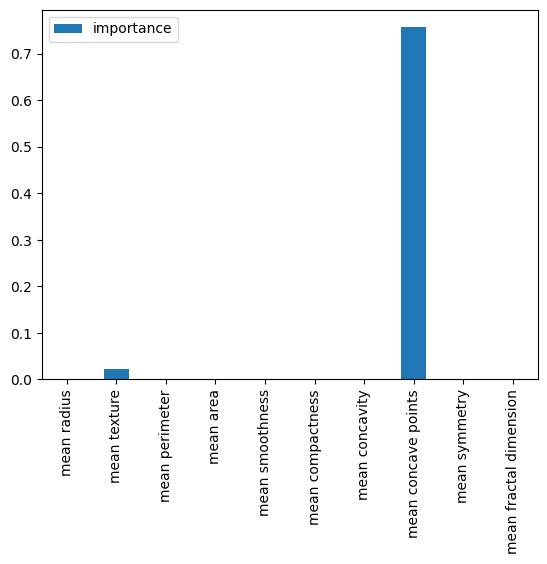

In [48]:
import matplotlib as plt
feature_importances_.head(10).plot(kind='bar')

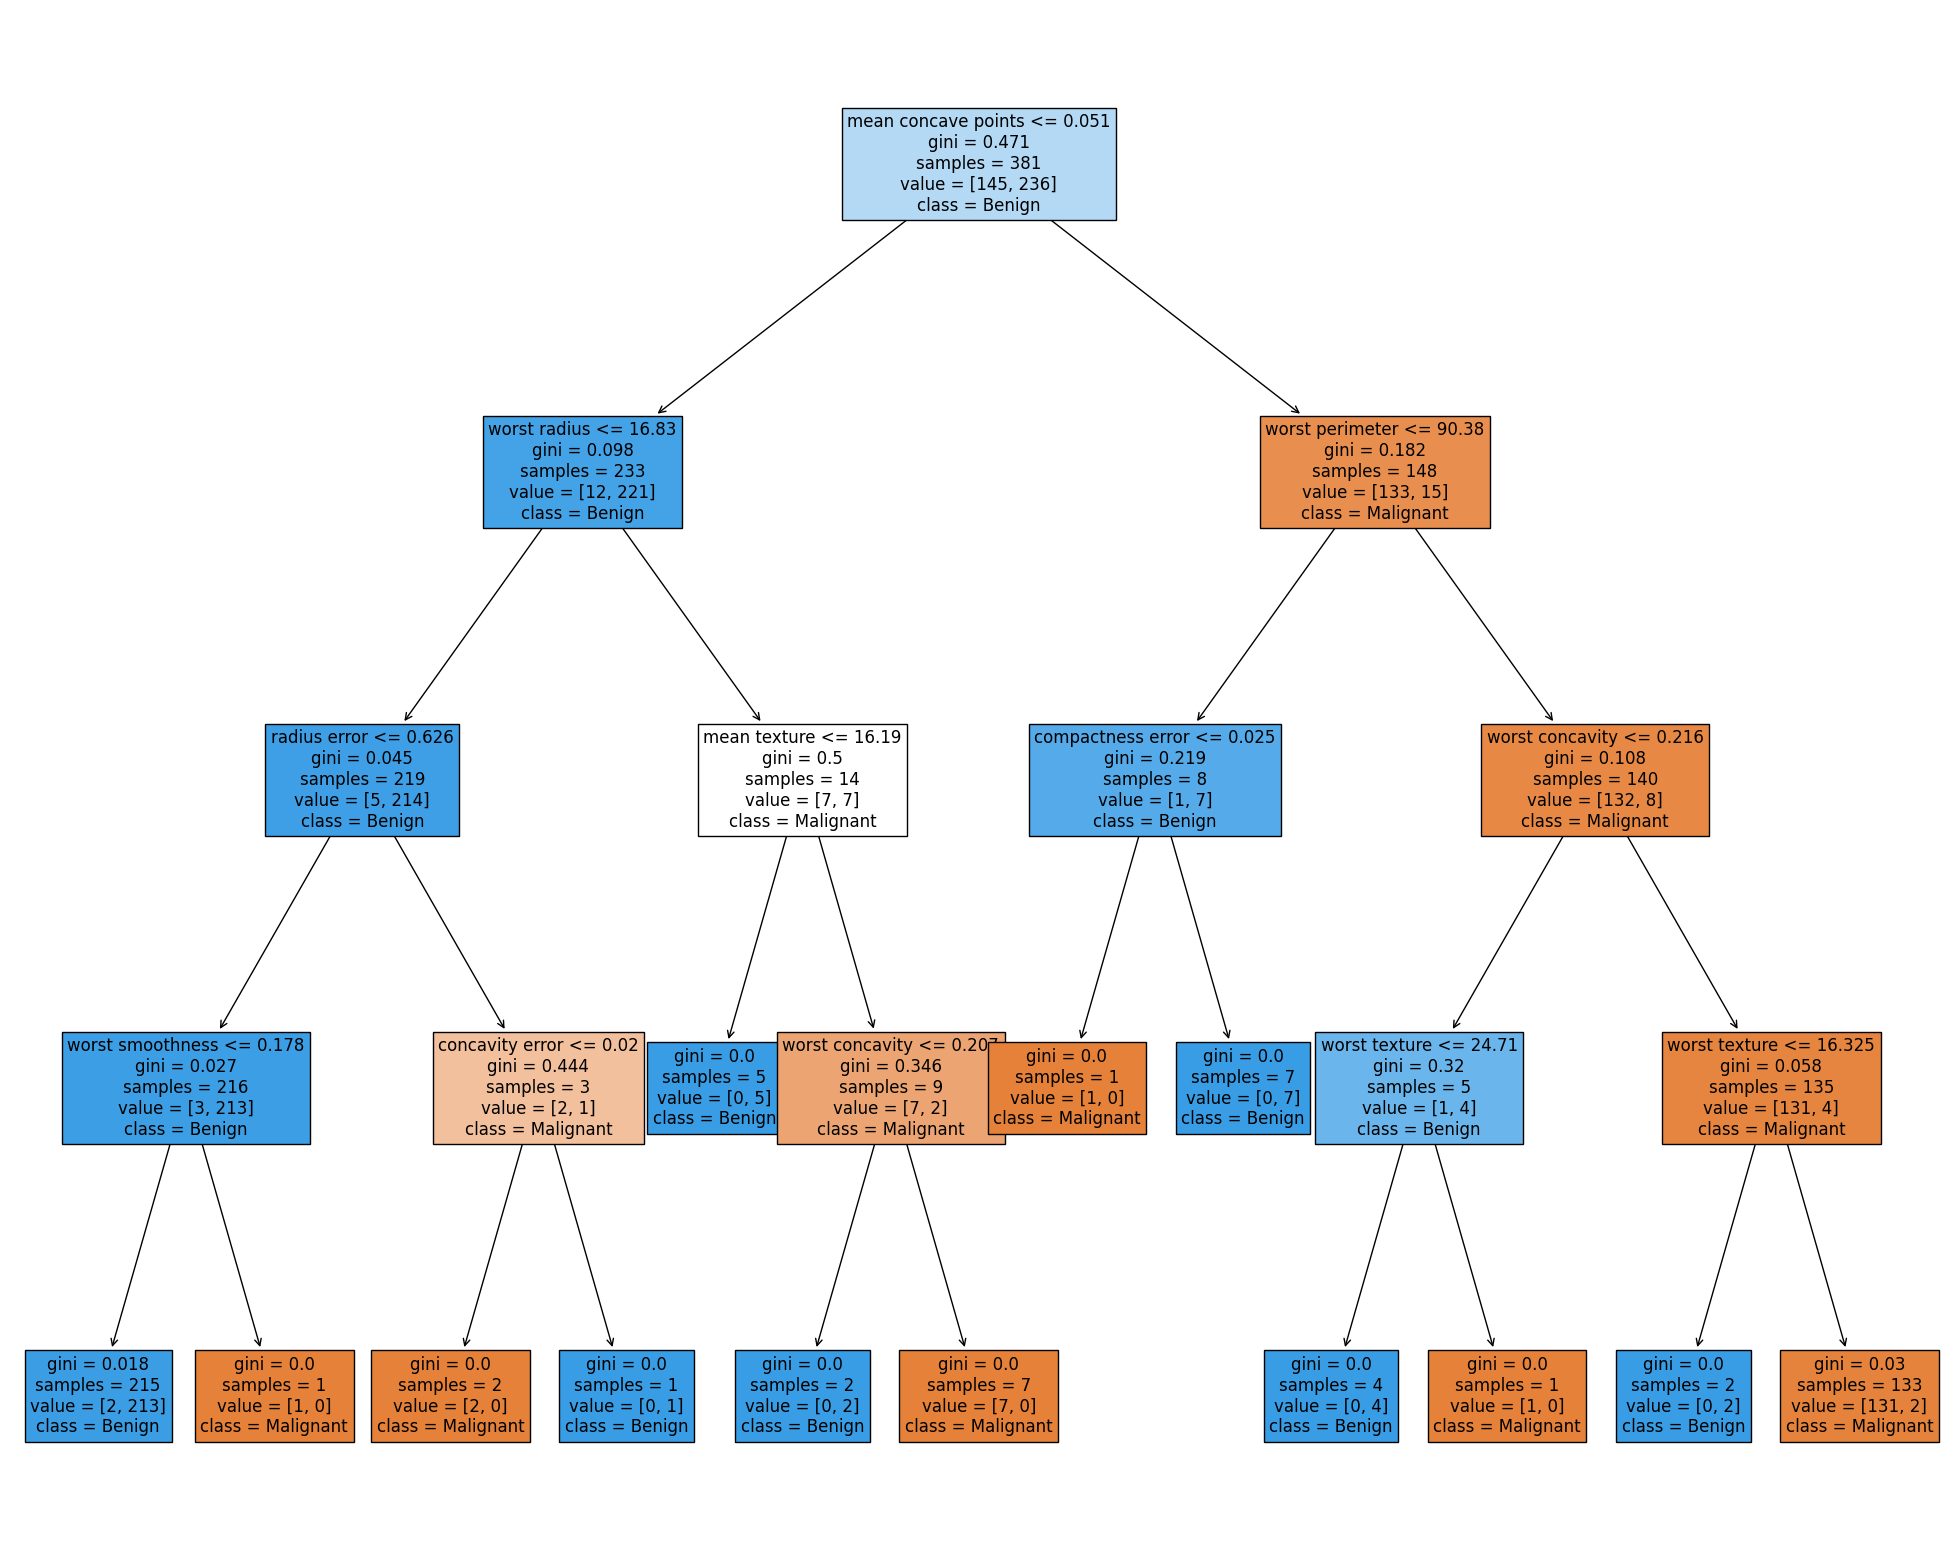

In [50]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(clf, feature_names=feature_names,class_names=['Malignant','Benign'], filled= True, fontsize= 12)

